In [1]:
import networkx as nx
import pylab as plt
import pandas as pd
import numpy as np
import math
from operator import itemgetter
from timeit import default_timer as timer

C:\Users\allen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Page Rank

<AxesSubplot:xlabel='Autori', ylabel='PR value'>

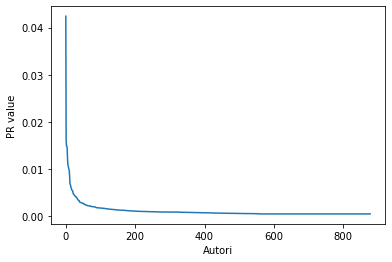

In [2]:
#NB: QUI PRIMA DI CALCOLARE PR HO RIMOSSO LE AUTOCITAZIONI, MENTRE GLI AUTORI CHE FANNO AUTOCITAZIONI SONO RIMASTI
PR_df = pd.read_csv('./PR_df.csv')
PR_df.sort_values(by='0',inplace = True, ascending=False)
PR_df.reset_index(drop = True, inplace = True)

plt.xlabel('Autori')
plt.ylabel('PR value')
PR_df['0'].plot()

In [3]:
PR_df['0'].max()

0.0424140089724826

In [4]:
PR_df['0'].min()

0.0004834505536795

In [5]:
PR_df['0'].sum()

0.9999999999999497

In [6]:
PR_df.columns
PR_df.rename(columns={'Unnamed: 0':'Author', '0':'PR_values'}, inplace = True)
PR_df

Author  PR_values
0    7c7699a363945e1b8c78c1cb3033b2871ff3dd535455d5...   0.042414
1    6931225d86818ee20b88f9c580fb0e8f918ba1f09b916b...   0.015953
2    ba0b01a499f90eb8110ed4d3cd35df37fbe631438ef175...   0.014931
3    7903ef60294057eaa94449fb3ef10feb9a0a770068e96c...   0.014887
4    87d3de23039c93bae7e85b1478e409191c5cec254487e4...   0.014411
..                                                 ...        ...
873  a354fe2d82ec506d3b4edcc32c95dbc378d7715bad268d...   0.000483
874  a34d59563902e910a1c2d709156d580da9b92f02c70d3e...   0.000483
875  a33667d5315320584dcdf350f9ad3ef8cebe9c3f038414...   0.000483
876  a0d4373ce60c02c7ef26814deb9d61687da1b3fdba873f...   0.000483
877  00168ef7c9a4fed70901c32e2a3311a60893e328859fcd...   0.000483

[878 rows x 2 columns]

# Communities Detection

In [9]:
DF = pd.read_csv('./AM_Matrix.csv')
DF.rename(columns={'Unnamed: 0':'From'}, inplace = True)
DF.set_index('From',inplace = True,drop=True)
DF

00168ef7c9a4fed70901c32e2a3311a60893e328859fcd615100cf40da97344e   
From                                                                                                                   
00168ef7c9a4fed70901c32e2a3311a60893e328859fcd6...                                                  0                 \
00a5614eecf54e2d713de00b7a6a75814ca14d573277911...                                                  0                  
00ef89995ea4bb4aa275935f61e7a0e088efbc28666464b...                                                  0                  
00f1809b78bdb4854c678a8900fca8c0454b78bc5a41811...                                                  0                  
010d2592c5ebdfdb9828fdf01e0f0e0a2c35734e9f0f653...                                                  0                  
...                                                                                               ...                  
fe8853528bdee7911b91829edffd3479ee6376168c87906...                                                  0                  
feca281ea68a9c47ec6fb59ec5d9f31d76105ad9d058a0d...                                                  0                  
ff24acad38556b1c8d521f449c0399008632be8d96b0c25...                                                  0                  
ff665fdeae13e20a855549e1e389b3992088650b2feea22...                                                  0                  
ff9af28010b1a78e3af698c64734cecf907988b927435d9...                                                  0                  

                                                    00a5614eecf54e2d713de00b7a6a75814ca14d5732779117f77346fa01ddca12   
From                                                                                                                   
00168ef7c9a4fed70901c32e2a3311a60893e328859fcd6...                                                  0                 \
00a5614eecf54e2d713de00b7a6a75814ca14d573277911...                                                  0                  
00ef89995ea4bb4aa275935f61e7a0e088efbc28666464b...                                                  0                  
00f1809b78bdb4854c678a8900fca8c0454b78bc5a41811...                                                  0                  
010d2592c5ebdfdb9828fdf01e0f0e0a2c35734e9f0f653...                                                  0                  
...                                                                                               ...                  
fe8853528bdee7911b91829edffd3479ee6376168c87906...                                                  0                  
feca281ea68a9c47ec6fb59ec5d9f31d76105ad9d058a0d...                                                  0                  
ff24acad38556b1c8d521f449c0399008632be8d96b0c25...                                                  0                  
ff665fdeae13e20a855549e1e389b3992088650b2feea22...                                                  0                  
ff9af28010b1a78e3af698c64734cecf907988b927435d9...                                                  0                  

                                                    00ef89995ea4bb4aa275935f61e7a0e088efbc28666464b11d6dd409616db1a2   
From                                                                                                                   
00168ef7c9a4fed70901c32e2a3311a60893e328859fcd6...                                                  0                 \
00a5614eecf54e2d713de00b7a6a75814ca14d573277911...                                                  0                  
00ef89995ea4bb4aa275935f61e7a0e088efbc28666464b...                                                  0                  
00f1809b78bdb4854c678a8900fca8c0454b78bc5a41811...                                                  0                  
010d2592c5ebdfdb9828fdf01e0f0e0a2c35734e9f0f653...                                                  0                  
...                                                                                       

In [8]:
#NB: QUI PRIMA DI CALCOARE COMM_DETE, HO RIMOSSO LE AUTOCITAZIONI E RIMOSSO GLI AUTORI CHE:
#UNA VOLTA RIMOSSE LE AUTOCITAZIONI NON VENIVANO CITATI NE CITAVANO ARTICOLI PRESENTI NEL DATASET.
# TALI AUTORI SONO AUTORI DI FRONTIERA CHE SUCCESSIVAMENTE SI AUTOCITAVANO SOLAMENTE (sono 7 in numero)
CDF = pd.read_csv('./Clusters_DF_Computed.csv')
CDF.rename(columns={'0':'Communities', '1':'Q'}, inplace = True)
CDF

Communities         Q
0    ['00168ef7c9a4fed70901c32e2a3311a60893e328859f... -0.000804
1    ['00168ef7c9a4fed70901c32e2a3311a60893e328859f...  0.000791
2    ['00168ef7c9a4fed70901c32e2a3311a60893e328859f...  0.002385
3    ['00168ef7c9a4fed70901c32e2a3311a60893e328859f...  0.003972
4    ['00168ef7c9a4fed70901c32e2a3311a60893e328859f...  0.005543
..                                                 ...       ...
821  ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...  0.551238
822  ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...  0.504777
823  ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...  0.372980
824  ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...  0.061689
825  ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...       NaN

[826 rows x 2 columns]

<AxesSubplot:xlabel='Iterazioni/Merge', ylabel='Q value'>

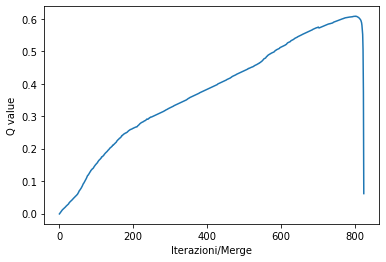

In [9]:
plt.xlabel('Iterazioni/Merge')
plt.ylabel('Q value')
CDF['Q'].plot()

In [10]:
CDF.iloc[CDF[CDF['Q']==CDF['Q'].max()].index[0]]

Communities    ['aaed2e86214195c2a43150d0e6a4e288976f826ed593...
Q                                                       0.607447
Name: 801, dtype: object

In [7]:
Best_Clusters_DF = pd.read_csv('./Best_Clusters_DF.csv')
Best_Clusters_DF.sort_values(by='cluster_size',inplace = True)

Best_Clusters_DF.reset_index(drop = True, inplace = True)
Best_Clusters_DF

cluster_authors  cluster_size
0   aaed2e86214195c2a43150d0e6a4e288976f826ed59325...             2
1   986eb8217077dcad2f72d1d47d64c1c1b3baee08674830...             2
2   9c02ad40ca501589752fd615c65651090b31e0d5b1fc2c...             2
3   9d08cafdcb8dd5466da8a8aaf2bfcc03ad6a0c117f3c5f...             2
4   a3e78182b1e6ec597dafb30ea49c54638dcba23a860760...             2
..                                                ...           ...
64  3c03e7028f7e347ac3722e9ed6bf58cbbde2f4843272c1...            45
65  34f728f16a77be8ea59ae8cc8a1cc1b386aef0d880ce62...            55
66  e0501caf31643f548e9c4ad89186e1bc63d7564851f165...            61
67  db9580ca3f3512baa130191ddf2e067fbffc339af4e59a...            92
68  fa82e5c8d2633cfb3a8ad4faf4d18e01ab13e4c1ba8acd...           210

[69 rows x 2 columns]

In [161]:
Best_Clusters_DF.cluster_size.sum()

871

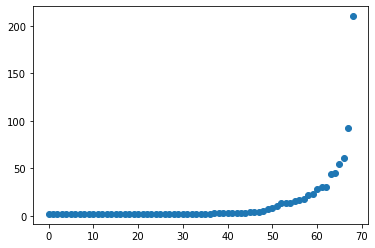

In [33]:
plt.scatter(Best_Clusters_DF.index,Best_Clusters_DF.cluster_size)

(array([63.,  4.,  1.,  0.,  1.]),
 array([  2. ,  43.6,  85.2, 126.8, 168.4, 210. ]),
 <BarContainer object of 5 artists>)

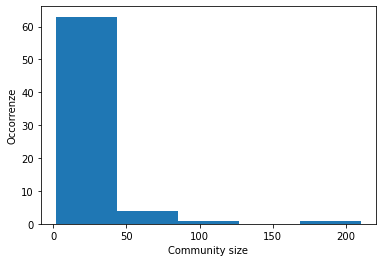

In [34]:
#Best_Clusters_DF['cluster_size'].plot()
plt.xlabel('Community size')
plt.ylabel('Occorrenze')

plt.hist(Best_Clusters_DF['cluster_size'], bins = [  2. ,  43.6,  85.2, 126.8, 168.4, 210. ])

871
871


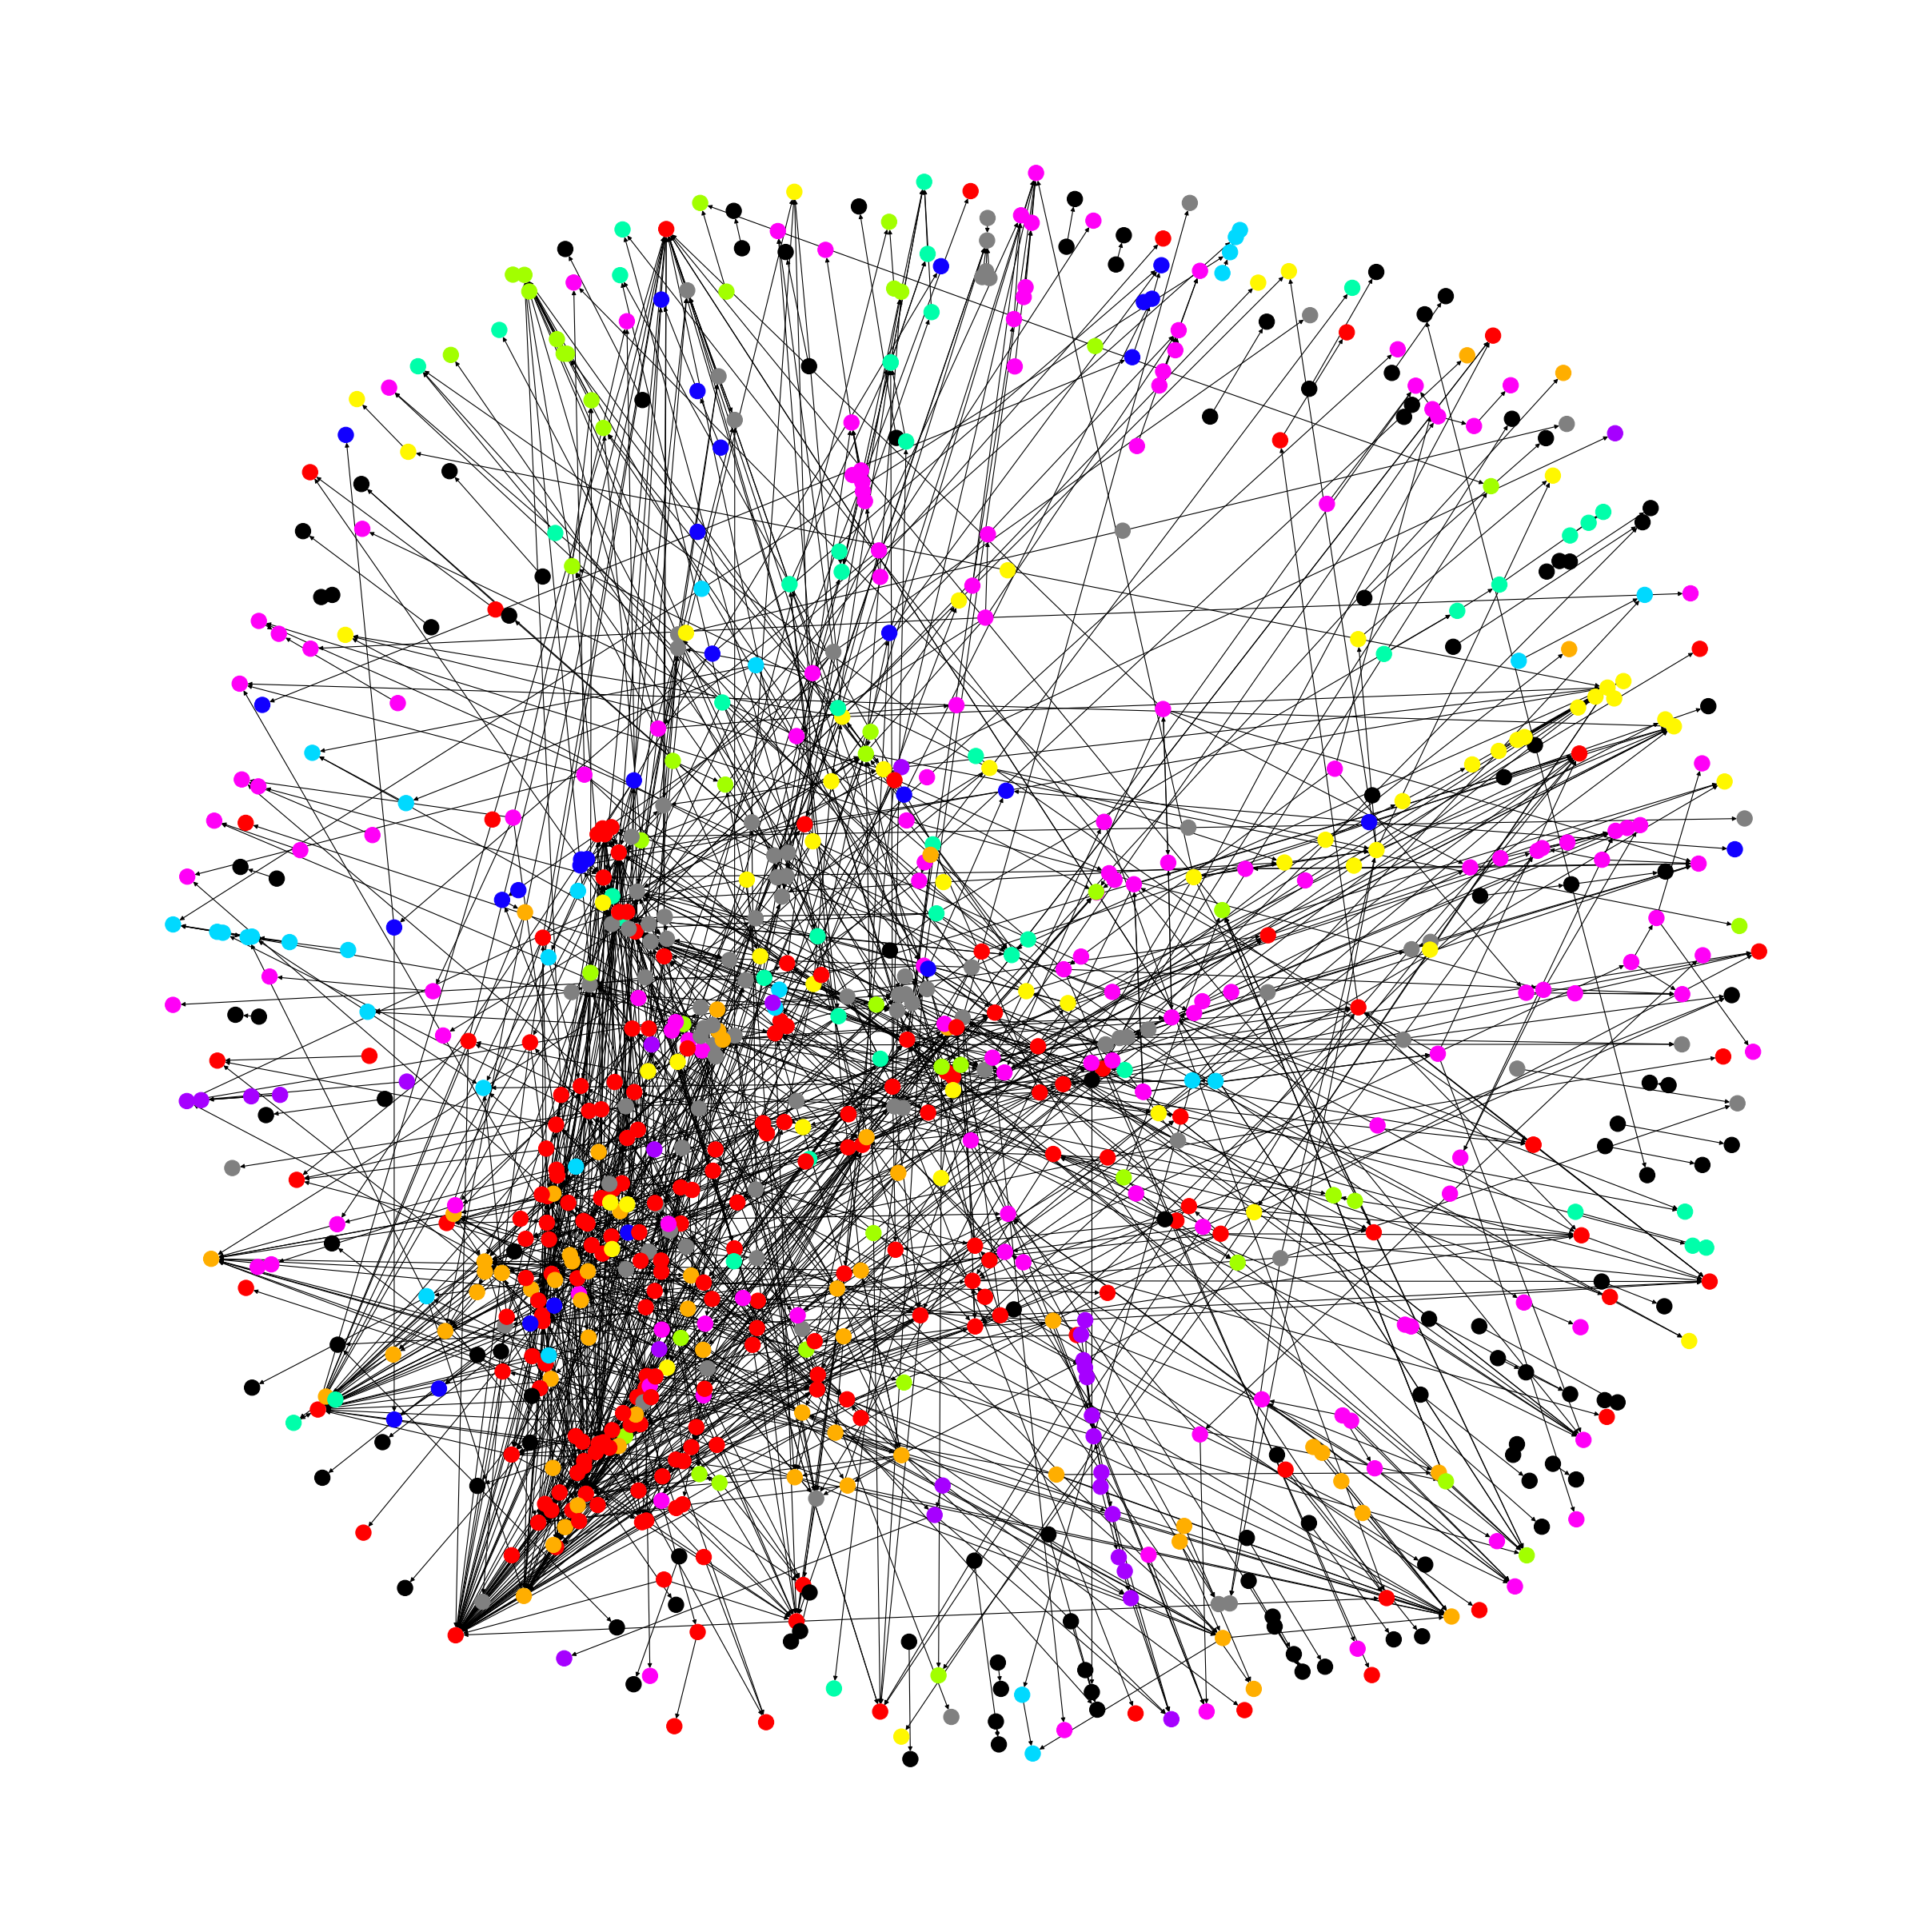

In [173]:
#GRAPH CREATION
from matplotlib.pyplot import figure
for i in DF.columns.values:
    DF.loc[i][i] = 0


#STAMPA GRAFO
D=nx.DiGraph()

#for i in DF.columns.values:
#    D.add_node(str(i),nodeId = str(i))
    
for i in DF.columns.values: 
    for j in DF.columns.values:
        w = DF.loc[i][j]
        if(i!=j and w > 0):           
            
            D.add_weighted_edges_from([(str(i),str(j),w)])


#GRAPH COLORS BASED ON COMMUNITIES

color_map = []
for node in D:
    for j in range(len(Best_Clusters_DF)):
        #splitted = Best_Clusters_DF.iloc[j]['cluster_authors'].split("-")
        if(node in Best_Clusters_DF.iloc[j]['cluster_authors']):
            if(j<50):
                color_map.append('#000000')#nero  - size < 8
            elif(j<60):
                color_map.append('#ff00f7') #magenta -  8 <=  size <= 23
            elif(j==60):
                color_map.append('#a600ff') #viola - size = 28
            elif(j==61):
                color_map.append('#1100ff') #blu - size = 30
            elif(j==62):
                color_map.append('#00d9ff') #azzurro - size = 30
            elif(j==63):
                color_map.append('#00ffaa') #verde chiaro - size = 44
            elif(j==64):
                color_map.append('#a2ff00') #verge-giallo - size = 45
            elif(j==65):
                color_map.append('#fff700') #giallo - size = 55
            elif(j==66):
                color_map.append('#ffae00') #arancione - size = 61
            elif(j==67):
                color_map.append('#808080') #grigio - size = 92
            elif(j==68):
                color_map.append('#ff0000') #rosso - size = 210
            continue
print(len(D.nodes))
print(len(color_map))


figure(figsize=(30, 30), dpi=80)

nx.draw(D, node_color=color_map, with_labels=False)
plt.show()

In [177]:
np.unique(color_map)

array(['#000000', '#00d9ff', '#00ffaa', '#1100ff', '#808080', '#a2ff00',
       '#a600ff', '#ff0000', '#ff00f7', '#ffae00', '#fff700'], dtype='<U7')

['#000000' '#00d9ff' '#00ffaa' '#1100ff' '#808080' '#a2ff00' '#a600ff'
 '#ff0000' '#ff00f7' '#ffae00' '#fff700']


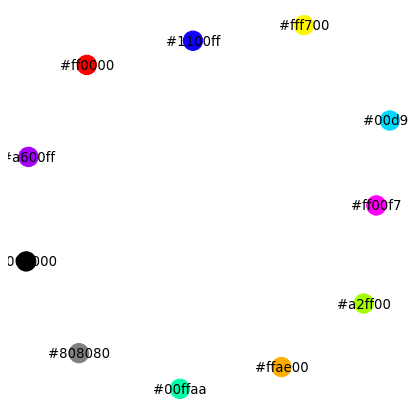

In [178]:
#GRAPH CREATION

#STAMPA GRAFO
D_COLOR=nx.DiGraph()

#dim clusters: [  2   3   4   5   7   8  10  13  14  16  17  18  22  23  28  30  44  45 55  61  92 210]


values = np.unique(color_map)

values_scelti = [22,23 , 28 , 30 , 44 , 45, 55 , 61 , 92,210]

print(values)
for i in values:
    D_COLOR.add_node(i)
    
figure(figsize=(5, 5), dpi=80)

nx.draw(D_COLOR, node_color=values, with_labels=True)
plt.show()
    
#SERVE PER CAPIRE QUALI COLORI SONO UTILIZZATI DA QUALE COMMUNITY => QUI ABBIAMO ASSOCIATO IL COLORE ALLA DIMENSIONE


# Communities validation

In [5]:
paperId_and_info_and_date_Seed = pd.read_csv('./paperId_and_info_and_date_Seed.csv')


In [ ]:
comm_members_titles = []

for i in range(len(paperId_and_info_and_date_Seed)):
    if(paperId_and_info_and_date_Seed.iloc[i]['Seed'] in Best_Clusters_DF.iloc[68]['cluster_authors']):
        comm_members_titles.append(paperId_and_info_and_date_Seed.iloc[i]['Title'])
        
comm_members_titles        

Compare the # of inner citations within a community vs # of outer citations among communities 

In [181]:
#rimuovo autocitazioni
for i in DF.columns.values:
    DF.loc[i][i] = 0


inner_cit = []
outer_cit = []

for i in range(len(Best_Clusters_DF)): #per ogni cluster
    inner_authors = Best_Clusters_DF.iloc[i]['cluster_authors'].split("-")
    #print(inner_authors)
    
    outer_authors = DF.columns.values
    #print(len(outer_authors))
    
    for j in inner_authors:
        outer_authors = np.delete(outer_authors, np.argwhere(outer_authors == j))
    #print(len(outer_authors))
    
    inner = 0
    outer = 0
    
    for j in inner_authors: #per ogni autore nel cluster
        inner += DF.loc[j][inner_authors].sum() #sommo citazioni verso autori nella mia community    
        outer += DF.loc[j][outer_authors].sum() #sommo citazioni verso autori in altre community
        
    inner_cit.append(inner)
    outer_cit.append(outer)
        

communities_comparison_df = pd.DataFrame(columns=['num_inner_cit','num_outer_cit'])
communities_comparison_df['num_inner_cit'] = inner_cit
communities_comparison_df['num_outer_cit'] = outer_cit

communities_comparison_df.sort_values(by='num_inner_cit',inplace = True)

communities_comparison_df.reset_index(drop = True, inplace = True)
communities_comparison_df


num_inner_cit  num_outer_cit
0               1              0
1               1              0
2               1              0
3               1              0
4               1              0
..            ...            ...
64             63             30
65             88             39
66            132             51
67            160             79
68            620             87

[69 rows x 2 columns]

In [182]:
communities_comparison_df[communities_comparison_df['num_inner_cit']<communities_comparison_df['num_outer_cit']]
#NON CI SONO COMM CON NUMERO CITAZIONI MAGGIORE ALL'ESTERNO RISPETTO A QUELLE INTERNE

Empty DataFrame
Columns: [num_inner_cit, num_outer_cit]
Index: []

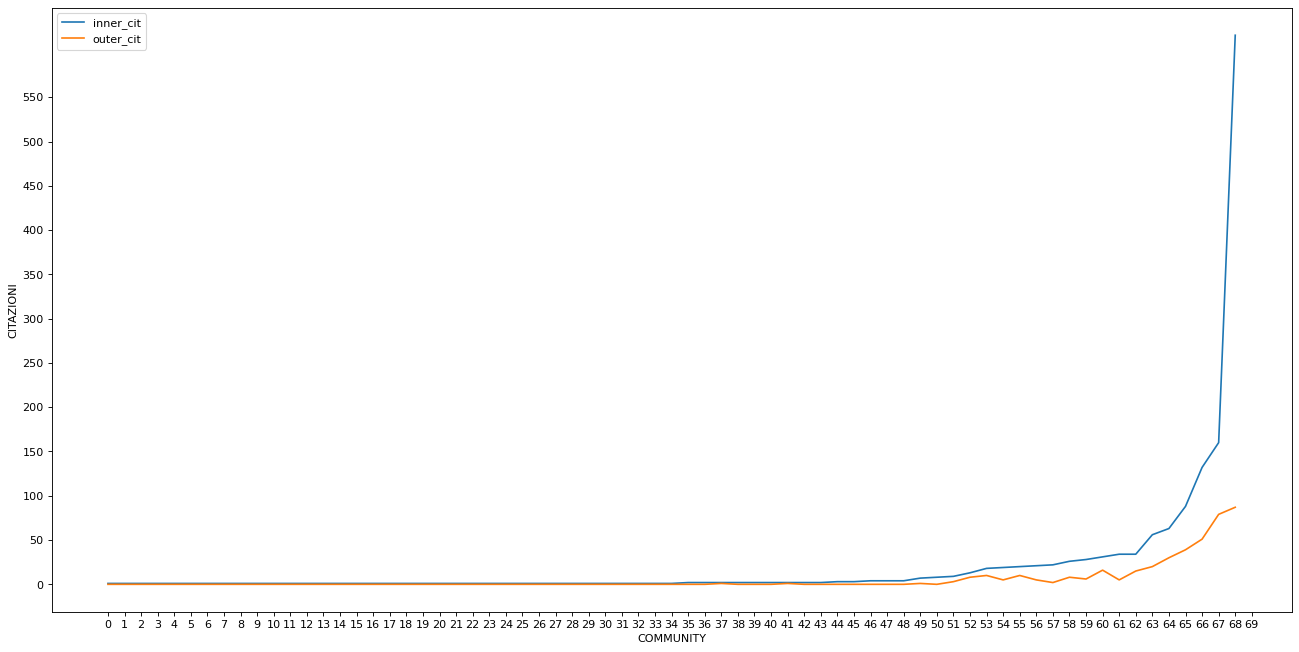

In [183]:
#plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_inner_cit'].values, label = "inner_cit")
#plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_outer_cit'].values, label = "outer_cit")
#plt.legend()
#plt.axis([0, 70, 0, 100])
#plt.show()



figure(figsize=(20, 10), dpi=80)
plt.xticks(np.arange(0, 70, step=1)) 
plt.yticks(np.arange(0, 600, step=50))
plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_inner_cit'].values, label = "inner_cit")
plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_outer_cit'].values, label = "outer_cit")
plt.xlabel('COMMUNITY')
plt.ylabel('CITAZIONI')
plt.legend()

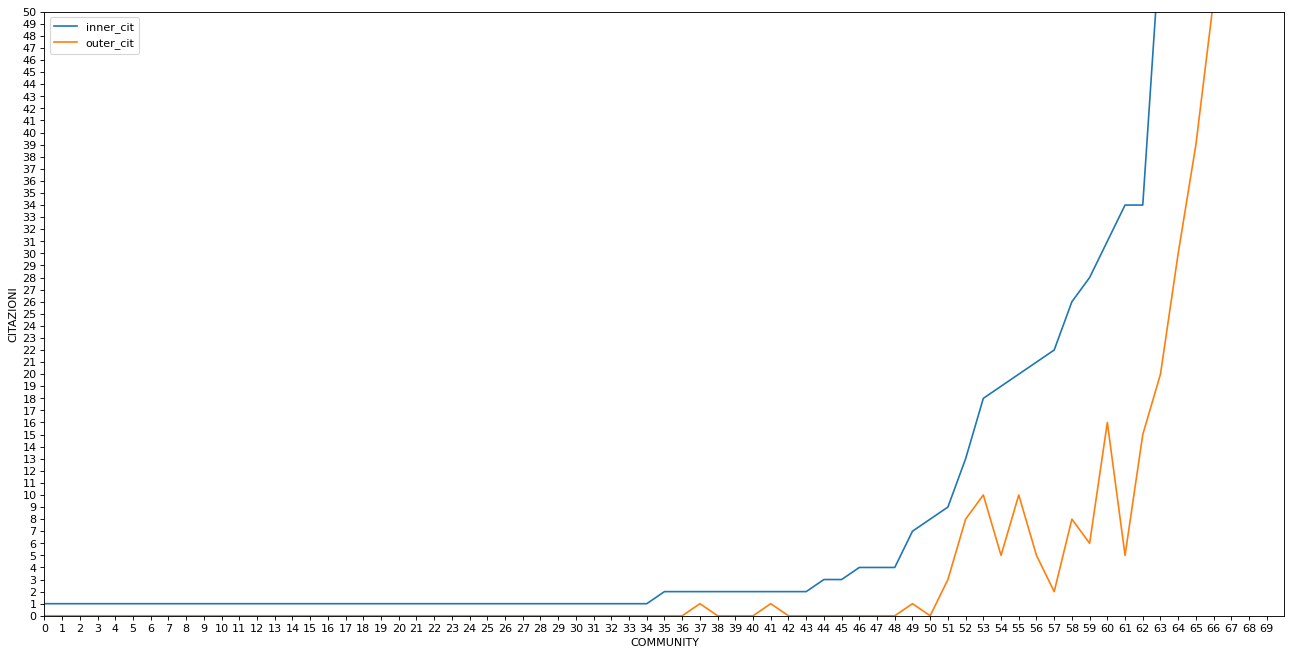

In [184]:
figure(figsize=(20, 10), dpi=80)
plt.xticks(np.arange(0, 70, step=1)) 
plt.yticks(np.arange(0, 60, step=1))
plt.xlabel('COMMUNITY')
plt.ylabel('CITAZIONI')
plt.axis([0, 70, 0, 50])
plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_inner_cit'].values, label = "inner_cit")
plt.plot(communities_comparison_df.index.values, communities_comparison_df['num_outer_cit'].values, label = "outer_cit")
plt.legend()


Cosine sim

In [155]:
from strsimpy.cosine import Cosine

cosine = Cosine(2)
s0 = 'My string'
s1 = 'My string'
p0 = cosine.get_profile(s0)
p1 = cosine.get_profile(s1)
print(cosine.similarity_profiles(p0, p1))

0.9999999999999998


Compare the cos sim of title within a cluster with title outside


In [2]:
import pandas as pd
import numpy as np
import string
import itertools
import spacy

# function to remove punctuation from text (input is a string)
def clean_text(sentence):
    
    clean_sentence = "".join(l for l in sentence if l not in string.punctuation)
    
    return clean_sentence

# function to calculate the cosine
def cosine_similarity_calc(vec_1,vec_2):
    
    sim = np.dot(vec_1,vec_2)/(np.linalg.norm(vec_1)*np.linalg.norm(vec_2))
    
    return sim

# function to calculate cosine similarity using word vectors (input is a series)
def embeddings_similarity(sentences):
    
    # first we need to get data into | sentence_a | sentence_b | format
    sentence_pairs = list(itertools.combinations(sentences, 2))
    
    sentence_a = [pair[0] for pair in sentence_pairs]
    sentence_b = [pair[1] for pair in sentence_pairs]
    
    sentence_pairs_df = pd.DataFrame({'sentence_a':sentence_a, 'sentence_b':sentence_b})
    
    # get unique combinations of sentance_a and sentance_b
    sentence_pairs_df = sentence_pairs_df.loc[
        pd.DataFrame(
            np.sort(sentence_pairs_df[['sentence_a', 'sentence_b']],1),
            index=sentence_pairs_df.index
        ).drop_duplicates(keep='first').index
    ]

    # remove instances where sentence a == sentence b
    sentence_pairs_df = sentence_pairs_df[sentence_pairs_df['sentence_a'] != sentence_pairs_df['sentence_b']]
    
    # load word embeddings (will use these to convert sentence to vectors)
    # Note you will need to run the following command (from cmd) to download embeddings: 
    # 'python -m spacy download en_core_web_lg'
    embeddings = spacy.load('en_core_web_lg')
    
    # now we are ready to calculate the similarity
    
    sentence_pairs_df['similarity'] = sentence_pairs_df.apply(
        lambda row: cosine_similarity_calc(
            embeddings(clean_text(row['sentence_a'])).vector, 
            embeddings(clean_text(row['sentence_b'])).vector), 
        axis=1
    )
    
    return sentence_pairs_df


#NB: 
#−1 value will indicate strongly opposite vectors

#0 independent (orthogonal) vectors

#1 similar (positive co-linear) vectors. Intermediate values are used to assess the degree of similarity.

In [3]:
# calculate similarity for sample sentences
sentences = ['Hi, how are you?', 'Hey what\'s up?', 'What\'s going on?']
print(embeddings_similarity(sentences))

         sentence_a        sentence_b  similarity
0  Hi, how are you?    Hey what's up?    0.460258
1  Hi, how are you?  What's going on?    0.359229
2    Hey what's up?  What's going on?    0.636974


In [15]:

avg_inner_similarity = []


for i in range(len(Best_Clusters_DF)): #per ogni cluster
    inner_authors = Best_Clusters_DF.iloc[i]['cluster_authors'].split("-")
    #print(inner_authors)
    
    outer_authors = DF.columns.values
    #print(len(outer_authors))
    
    for j in inner_authors:
        outer_authors = np.delete(outer_authors, np.argwhere(outer_authors == j))
    #print(len(outer_authors))
    
    #ho definito inner_authors e outer_authors per ogni cluster
    
    titles = paperId_and_info_and_date_Seed[paperId_and_info_and_date_Seed['Seed'].isin(inner_authors)]['Title'].values
    
    #print(titles)
    
    #sentences = ['Hi, how are you?', 'Hey what\'s up?', 'What\'s going on?']
    print(f'Comm: {i}')
    
    avg_inner_similarity.append(embeddings_similarity(titles).similarity.mean())
    
    print('##')

Comm: 0
##
Comm: 1
##
Comm: 2
##
Comm: 3
##
Comm: 4
##
Comm: 5
##
Comm: 6
##
Comm: 7
##
Comm: 8
##
Comm: 9
##
Comm: 10
##
Comm: 11
##
Comm: 12
##
Comm: 13
##
Comm: 14
##
Comm: 15
##
Comm: 16
##
Comm: 17
##
Comm: 18
##
Comm: 19
##
Comm: 20
##
Comm: 21
##
Comm: 22
##
Comm: 23
##
Comm: 24
##
Comm: 25
##
Comm: 26
##
Comm: 27
##
Comm: 28
##
Comm: 29
##
Comm: 30
##
Comm: 31
##
Comm: 32
##
Comm: 33
##
Comm: 34
##
Comm: 35
##
Comm: 36
##
Comm: 37
##
Comm: 38
##
Comm: 39
##
Comm: 40
##
Comm: 41
##
Comm: 42
##
Comm: 43
##
Comm: 44
##
Comm: 45
##
Comm: 46
##
Comm: 47
##
Comm: 48
##
Comm: 49
##
Comm: 50
##
Comm: 51
##
Comm: 52
##
Comm: 53
##
Comm: 54
##
Comm: 55
##
Comm: 56
##
Comm: 57
##
Comm: 58
##
Comm: 59
##
Comm: 60
##
Comm: 61
##
Comm: 62
##
Comm: 63


<ipython-input-2-2853e94366b0>:17: RuntimeWarning: invalid value encountered in float_scalars
  sim = np.dot(vec_1,vec_2)/(np.linalg.norm(vec_1)*np.linalg.norm(vec_2))


##
Comm: 64
##
Comm: 65
##
Comm: 66


<ipython-input-2-2853e94366b0>:17: RuntimeWarning: invalid value encountered in float_scalars
  sim = np.dot(vec_1,vec_2)/(np.linalg.norm(vec_1)*np.linalg.norm(vec_2))


##
Comm: 67
##
Comm: 68


<ipython-input-2-2853e94366b0>:17: RuntimeWarning: invalid value encountered in float_scalars
  sim = np.dot(vec_1,vec_2)/(np.linalg.norm(vec_1)*np.linalg.norm(vec_2))


##


In [16]:
avg_inner_similarity

[0.28365034,
 0.7866049,
 0.76530844,
 0.5990558,
 0.65357065,
 0.61032206,
 0.671455,
 0.69866323,
 0.6434403,
 0.7137133,
 0.6374021,
 0.49604395,
 0.86828685,
 0.73418325,
 0.5357794,
 0.3663745,
 0.47516093,
 0.85735905,
 0.5551299,
 0.285151,
 0.67529947,
 0.82582307,
 0.5873696,
 0.65045923,
 0.5335973,
 0.5255337,
 0.40259448,
 0.4999493,
 0.7902098,
 0.88056266,
 0.6138999,
 0.3106996,
 0.74052024,
 0.5386437,
 0.5972001,
 0.6360688,
 0.7734129,
 0.7652729,
 0.6184613,
 0.7121146,
 0.53495044,
 0.43757164,
 0.6496389,
 0.71616286,
 0.5153071,
 0.49847355,
 0.635581,
 0.59769505,
 0.6451158,
 0.68611705,
 0.5878728,
 0.7664564,
 0.63568324,
 0.5929952,
 0.62698203,
 0.61949635,
 0.59225494,
 0.61297643,
 0.66271716,
 0.61827,
 0.60702324,
 0.67684734,
 0.6328707,
 0.6251872,
 0.59935355,
 0.58831215,
 0.65951514,
 0.5794386,
 0.5969466]

In [21]:
np.mean(avg_inner_similarity)

0.61901677

In [29]:

avg_outer_similarity = []

#len(Best_Clusters_DF)
for i in range(1): #per ogni cluster
    inner_authors = Best_Clusters_DF.iloc[i]['cluster_authors'].split("-")
    #print(inner_authors)
    
    outer_authors = DF.columns.values
    #print(len(outer_authors))
    
    for j in inner_authors:
        outer_authors = np.delete(outer_authors, np.argwhere(outer_authors == j))
    #print(len(outer_authors))
    
    #ho definito inner_authors e outer_authors per ogni cluster
    
    titles_inner = paperId_and_info_and_date_Seed[paperId_and_info_and_date_Seed['Seed'].isin(inner_authors)]['Title'].values
    
    print(titles_inner)
    
    titles_outer = paperId_and_info_and_date_Seed[paperId_and_info_and_date_Seed['Seed'].isin(outer_authors)]['Title'].values
    #print(titles)
    
    print(titles_outer)
    
    titles = titles_inner
    
    for i in titles_outer:
        titles = np.append(titles,i)
    
    print(titles)
    #sentences = ['Hi, how are you?', 'Hey what\'s up?', 'What\'s going on?']
    print(f'Comm: {i}')
    
    avg_outer_similarity.append(embeddings_similarity(titles).similarity.mean())
    
    print('##')
    
avg_outer_similarity

['Are Strings Thermostrings?'
 'The Negative Energy of Gravitation as Stabilizational Factor in Field'
 'Theory of Stochastic Space-Time. 1. Gravitation as Quantum Diffusion']
['Magnetic Interactions of D-branes and Wess-Zumino Terms in Super'
 'Tachyonic neutrinos?'
 'The generalized chiral Schwinger model on the two-sphere' ...
 'Soliton Solutions of M-theory on an Orbifold'
 'Gaugino Condensation, Moduli Potentials and Supersymmetry Breaking in'
 'Target-Space Duality in Heterotic and Type I Effective Lagrangians']
['Are Strings Thermostrings?'
 'The Negative Energy of Gravitation as Stabilizational Factor in Field'
 'Theory of Stochastic Space-Time. 1. Gravitation as Quantum Diffusion'
 ... 'Soliton Solutions of M-theory on an Orbifold'
 'Gaugino Condensation, Moduli Potentials and Supersymmetry Breaking in'
 'Target-Space Duality in Heterotic and Type I Effective Lagrangians']
Comm: Target-Space Duality in Heterotic and Type I Effective Lagrangians


<ipython-input-2-2853e94366b0>:17: RuntimeWarning: invalid value encountered in float_scalars
  sim = np.dot(vec_1,vec_2)/(np.linalg.norm(vec_1)*np.linalg.norm(vec_2))


KeyboardInterrupt: 